# Task 1

In [1]:
# Cell 1: load survival library and data
library(survival)

# adjust the path if needed
bank <- read.csv("Bank_Attrition.csv", stringsAsFactors = FALSE)

# quick check
head(bank)


,CustomerID,Age,Income,HomeVal,Tenure,DirectDeposit,Loan,NumAccounts,Dist,MktShare,ChurnTime,Censored
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,1,62,4.8,27.5,2.529774,0,0,2,1.302308,0.02913851,5.0,0
2,2,47,15.0,47.5,2.809035,0,0,2,1.302308,0.02913851,5.2,0
3,3,42,3.8,18.7,2.748802,0,0,2,1.302308,0.02913851,4.2,0
4,4,47,7.5,55.0,8.010951,0,1,3,1.302308,0.02913851,0.1,0
5,5,67,15.0,95.0,11.003422,0,1,3,3.516000,0.02913851,12.5,0
6,6,57,15.0,37.5,2.759754,0,0,1,6.602500,0.02913851,5.4,0


In [2]:
# Cell 2: fit a Weibull survival regression (AFT scale; equivalent PH under the Weibull)
weibull_model <- survreg(
    Surv(ChurnTime, Censored == 0) ~
        Age + Income + HomeVal + Tenure +
        DirectDeposit + Loan + NumAccounts +
        Dist + MktShare,
    data = bank,
    dist = "weibull"
)

# display the full model output
summary(weibull_model)



Call:
survreg(formula = Surv(ChurnTime, Censored == 0) ~ Age + Income + 
    HomeVal + Tenure + DirectDeposit + Loan + NumAccounts + Dist + 
    MktShare, data = bank, dist = "weibull")
                  Value Std. Error      z       p
(Intercept)    2.082330   0.056983  36.54 < 2e-16
Age            0.002568   0.000748   3.43  0.0006
Income        -0.008737   0.002682  -3.26  0.0011
HomeVal        0.000507   0.000561   0.90  0.3660
Tenure         0.004110   0.001038   3.96 7.5e-05
DirectDeposit  0.054730   0.021014   2.60  0.0092
Loan          -0.015452   0.028043  -0.55  0.5816
NumAccounts    0.005422   0.008708   0.62  0.5335
Dist          -0.006569   0.011971  -0.55  0.5832
MktShare       0.007986   0.059472   0.13  0.8932
Log(scale)    -0.813206   0.017582 -46.25 < 2e-16

Scale= 0.443 

Weibull distribution
Loglik(model)= -5891.7   Loglik(intercept only)= -5931
	Chisq= 78.55 on 9 degrees of freedom, p= 3.1e-13 
Number of Newton-Raphson Iterations: 7 
n= 2505 


### 1. Model Formulation

We fitted an accelerated-failure-time (AFT) Weibull model of the form

$$
\log(T_i) = \mathbf{x}_i^T\boldsymbol{\beta} + \sigma\,\varepsilon_i,
$$

where  
- $T_i$ = months until customer $i$ churns,  
- $\mathbf{x}_i$ = {Age, Income, HomeVal, Tenure, DirectDeposit, Loan, NumAccounts, Dist, MktShare},  
- $\boldsymbol{\beta}$ = AFT coefficients,  
- $\sigma$ = scale parameter (≈ 0.443),  
- $\varepsilon$ follows an extreme-value distribution.  

A positive $\beta_j$ ⇒ **longer** expected survival (lower hazard),  
a negative $\beta_j$ ⇒ **shorter** expected survival (higher hazard).

---

### 2. Significance of Covariates

| Variable          | AFT Coef $\beta$ | Std. Err | z     | p-value  | Significant? |
|-------------------|------------------:|---------:|------:|---------:|:------------:|
| **Age**           |   0.002568        | 0.000748 |  3.43 |  0.0006  | Yes          |
| **Income**        |  −0.008737        | 0.002682 | −3.26 |  0.0011  | Yes          |
| **HomeVal**       |   0.000507        | 0.000561 |  0.90 |  0.3660  | No           |
| **Tenure**        |   0.004110        | 0.001038 |  3.96 | 7.5e-05  | Yes          |
| **DirectDeposit** |   0.054730        | 0.021014 |  2.60 |  0.0092  | Yes          |
| **Loan**          |  −0.015452        | 0.028043 | −0.55 |  0.5816  | No           |
| **NumAccounts**   |   0.005422        | 0.008708 |  0.62 |  0.5335  | No           |
| **Dist**          |  −0.006569        | 0.011971 | −0.55 |  0.5832  | No           |
| **MktShare**      |   0.007986        | 0.059472 |  0.13 |  0.8932  | No           |

---

### 3. Proportional-Hazards (PH) Hazard Ratios

Under a Weibull AFT model,  
$$
\text{HR}_j = \exp\left(-\frac{\beta_j}{\sigma}\right),
$$
with $\sigma = 0.443$.  

| Variable          | $\beta_j$  | $-\beta_j/\sigma$ | HR = $\exp(-\beta_j/\sigma)$ | Interpretation                                              |
|-------------------|------------:|------------------:|-----------------------------:|-------------------------------------------------------------|
| **Age**           | 0.002568    | −0.00580          | 0.9942                       | +1 year ⇒ 0.6% **lower** churn hazard                        |
| **Income**        | −0.008737   | +0.01973          | 1.0200                       | +1 income unit ⇒ 2.0% **higher** churn hazard               |
| **Tenure**        | 0.004110    | −0.00928          | 0.9907                       | +1 month tenure ⇒ 0.9% **lower** churn hazard               |
| **DirectDeposit** | 0.054730    | −0.12354          | 0.8839                       | Direct-deposit users ⇒ 11.6% **lower** churn hazard vs. non |

---

### 4. Key Takeaways

- **Age**: Older customers are stickier (≈ 0.6% lower hazard per year).  
- **Income**: Higher-income customers churn slightly faster (≈ 2.0% higher hazard per unit).  
- **Tenure**: Each additional month reduces hazard by ≈ 0.9%.  
- **Direct Deposit**: Users have ~12% lower hazard than non-users.  
- The other covariates (HomeVal, Loan, NumAccounts, Dist, MktShare) were not statistically significant in this Weibull model.

---

# Task 2

In [3]:
# 1. Extract the δ (“AFT”) coefficients and σ
delta <- coef(weibull_model) # Named vector of δ̂_j
sigma <- weibull_model$scale # σ̂
shape_a <- 1 / sigma # Weibull shape â

# 2. Transform to PH coefficients β̂_j = –δ̂_j / σ̂
beta_PH <- -delta / sigma

# 3. (Optional) Compute hazard ratios HR_j = exp(β̂_j)
HR <- exp(beta_PH)

# 4. Tabulate results (dropping the intercept and log(scale) entries)
vars <- setdiff(names(delta), c("(Intercept)", "Log(scale)"))
out <- data.frame(
    Variable    = vars,
    delta       = delta[vars],
    beta_PH     = beta_PH[vars],
    HR          = HR[vars]
)
rownames(out) <- NULL

# 5. Print shape and the table
cat("Weibull shape parameter a =", round(shape_a, 3), "\n\n")
print(out)


Weibull shape parameter a = 2.255 

       Variable         delta      beta_PH        HR
1           Age  0.0025682409 -0.005791709 0.9942250
2        Income -0.0087374458  0.019704049 1.0198995
3       HomeVal  0.0005074515 -0.001144367 0.9988563
4        Tenure  0.0041097141 -0.009267927 0.9907749
5 DirectDeposit  0.0547301118 -0.123423346 0.8838894
6          Loan -0.0154520648  0.034846367 1.0354606
7   NumAccounts  0.0054222535 -0.012227870 0.9878466
8          Dist -0.0065688877  0.014813675 1.0149239
9      MktShare  0.0079861822 -0.018009854 0.9821514


### Weibull Shape Parameter

- **Estimated shape** $a = 2.255$  
  Since $a > 1$, the instantaneous churn hazard **increases** over time (customers become more likely to leave the longer they've been with the bank).

---

### AFT (δ) vs. PH (β) Coefficients

| Variable        | δ (AFT)    | AFT Interpretation                                        | β (PH)     | HR         | PH Interpretation                                         |
|-----------------|-----------:|-----------------------------------------------------------|-----------:|-----------:|-----------------------------------------------------------|
| **Age**         | +0.002568  | +1 year ⇒ $\exp(0.002568)-1\approx0.26\%$ **longer** median survival  | −0.005792 | 0.9942 (↓0.58%) | +1 year ⇒ 0.58% **lower** instantaneous churn hazard      |
| **Income**      | −0.008737  | +1 unit ⇒ $\exp(-0.008737)-1\approx-0.87\%$ **shorter** median survival | +0.019704 | 1.0199 (↑1.99%) | +1 unit ⇒ 1.99% **higher** instantaneous churn hazard     |
| **HomeVal**     | +0.000507  | +1 unit ⇒ ~0.05% longer survival (negligible)             | −0.001144 | 0.9989 (↓0.11%) | Effect essentially null                                  |
| **Tenure**      | +0.004110  | +1 month ⇒ ~0.41% **longer** median survival              | −0.009268 | 0.9908 (↓0.92%) | +1 month ⇒ 0.92% **lower** churn hazard                   |
| **DirectDeposit**| +0.054730 | Having direct deposit ⇒ $\exp(0.05473)-1\approx5.63\%$ longer survival | −0.123423 | 0.8839 (↓11.61%) | Direct‐deposit users ⇒ 11.6% **lower** churn hazard      |
| **Loan**        | −0.015452  | Having a loan ⇒ ~1.54% **shorter** median survival        | +0.034846 | 1.0355 (↑3.55%) | Loan holders ⇒ 3.55% **higher** churn hazard              |
| **NumAccounts** | +0.005422  | +1 account ⇒ ~0.54% longer survival                       | −0.012228 | 0.9878 (↓1.22%) | +1 account ⇒ 1.22% **lower** churn hazard                 |
| **Dist**        | −0.006569  | +1 unit ⇒ ~0.65% **shorter** median survival              | +0.014814 | 1.0149 (↑1.49%) | +1 unit farther ⇒ 1.49% **higher** churn hazard           |
| **MktShare**    | +0.007986  | +1 unit ⇒ ~0.80% longer survival                          | −0.018010 | 0.9822 (↓1.78%) | +1 unit ⇒ 1.78% **lower** churn hazard                    |

---

**How to read this:**  
- **δ (AFT)**: $\exp(\delta_j)-1$ ≈ % change in **median** time to churn.  
- **β (PH)** + **HR**: % change in **instantaneous** churn hazard per unit.  
- Positive δ ⇒ longer survival; negative δ ⇒ shorter survival.  
- Positive β (HR>1) ⇒ higher hazard; negative β (HR<1) ⇒ lower hazard.

---

# Task 3

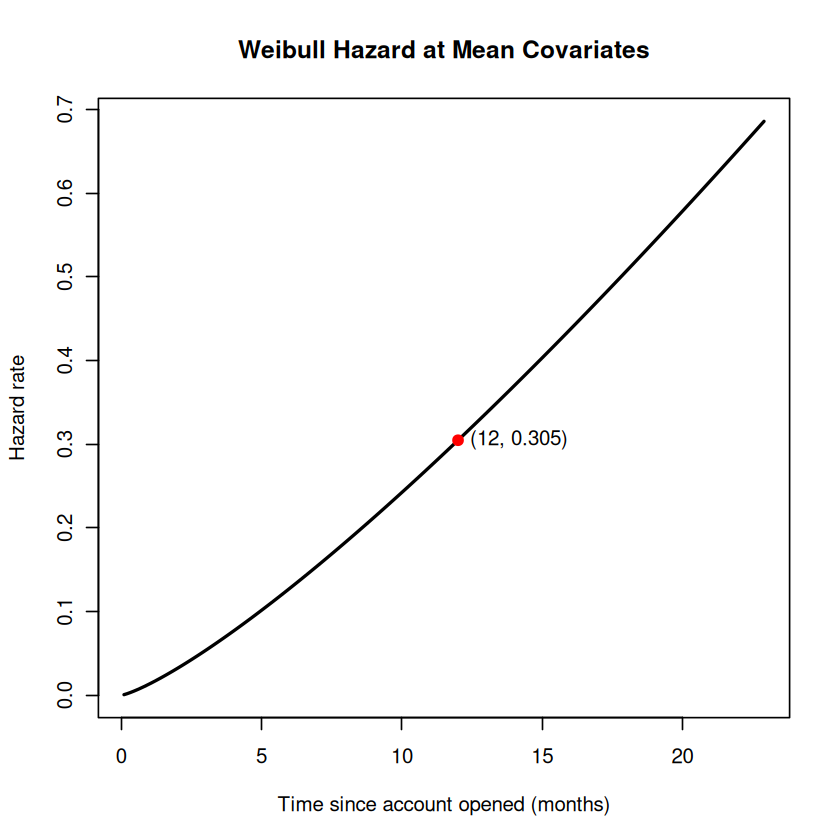

In [4]:
# Cell 1: Compute mean covariate values and extract Weibull parameters
covs <- c(
    "Age", "Income", "HomeVal", "Tenure",
    "DirectDeposit", "Loan", "NumAccounts", "Dist", "MktShare"
)

# mean of each explanatory variable
means <- colMeans(bank[, covs])

# δ̂ coefficients and scale σ̂ from survreg
delta <- coef(weibull_model)
sigma_hat <- weibull_model$scale
shape_param <- 1 / sigma_hat # Weibull shape â

# linear predictor at mean covariates → μ̂ = δ₀ + Σ δⱼ·meanⱼ
mu_hat <- delta["(Intercept)"] + sum(delta[covs] * means)

# Weibull scale λ̂ = exp(μ̂)
lambda_hat <- exp(mu_hat)

# Cell 2: Build time grid, compute hazard, and plot
t_max <- max(bank$ChurnTime)
t_seq <- seq(from = 0.1, to = t_max, length.out = 200)

# hazard h(t) = (a/λ) * (t/λ)^(a - 1)
hazard <- (shape_param / lambda_hat) * (t_seq / lambda_hat)^(shape_param - 1)

# Plot
plot(
    t_seq, hazard,
    type = "l", lwd = 2,
    xlab = "Time since account opened (months)",
    ylab = "Hazard rate",
    main = "Weibull Hazard at Mean Covariates"
)

# Optional: highlight a particular point, e.g. t = 12 months
t0 <- 12
h_t0 <- (shape_param / lambda_hat) * (t0 / lambda_hat)^(shape_param - 1)
points(t0, h_t0, col = "red", pch = 19)
text(t0, h_t0, paste0("(", t0, ", ", round(h_t0, 3), ")"), pos = 4)


### 3. Hazard Function at Mean Covariates

The plot below shows the estimated Weibull hazard rate \(h(t)\) evaluated at the mean values of all nine covariates:

![Weibull Hazard at Mean Covariates](attachment:Weibull_Hazard_at_Mean_Covariates.png)

- **Duration dependence:**  
  The hazard curve is **strictly increasing** over time (and the estimated shape \(a\approx2.255>1\)), so the churn hazard exhibits **positive duration dependence**.  
  > _Interpretation:_ The longer a customer stays with the bank, the higher their instantaneous risk of leaving.

- **Meaning of the hazard rate:**  
  At any time \(t\), \(h(t)\) gives the instantaneous probability (per month) of churning at \(t\), conditional on having not churned before \(t\).  
  - E.g. \(h(t)=0.2\) means a 20% risk of churning in the next month around time \(t\).

- **Example point—(12 months, 0.305):**  
  At **t = 12 months**, the hazard rate is approximately **0.305**.  
  > _Interpretation:_ A “typical” customer who has remained for one year faces about a **30.5%** instantaneous risk of closing their account in the next month.

---

# Task 4


In [ ]:
# Compute means, Weibull parameters, and theoretical density
covs <- c(
    "Age", "Income", "HomeVal", "Tenure",
    "DirectDeposit", "Loan", "NumAccounts", "Dist", "MktShare"
)

# Mean of each covariate
means <- colMeans(bank[, covs])

# AFT coefficients and scale
delta <- coef(weibull_model)
sigma_hat <- weibull_model$scale

# Weibull shape a and scale λ
shape_param <- 1 / sigma_hat
mu_hat <- delta["(Intercept)"] + sum(delta[covs] * means)
lambda_hat <- exp(mu_hat)

# Time grid and density values
t_max <- max(bank$ChurnTime)
t_seq <- seq(0, t_max, length.out = 200)
wei_density <- dweibull(t_seq, shape = shape_param, scale = lambda_hat)


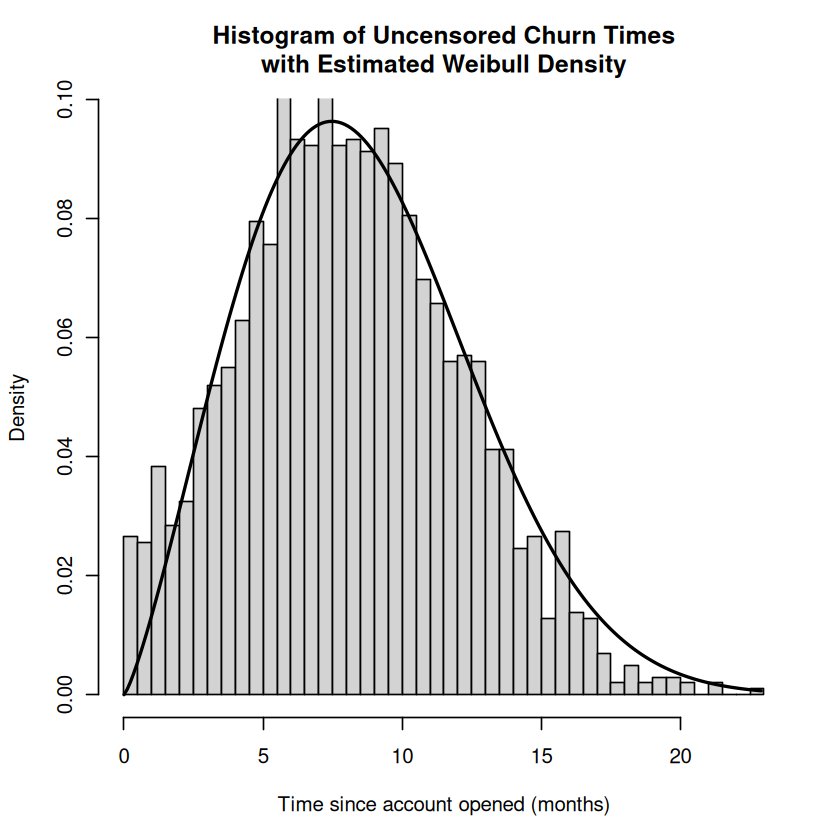

In [12]:
# histogram of uncensored ChurnTime + overlay Weibull density
hist(
    bank$ChurnTime[bank$Censored == 0],
    breaks = 50,
    freq = FALSE,
    xlab = "Time since account opened (months)",
    ylab = "Density",
    main = "Histogram of Uncensored Churn Times\nwith Estimated Weibull Density",
    ylim = c(0, max(wei_density))
)

lines(
    t_seq,
    wei_density,
    lwd = 2
)


In [13]:
# histogram object without plotting
hist_obj <- hist(
    bank$ChurnTime[bank$Censored == 0],
    breaks = 50,
    freq = FALSE,
    plot = FALSE
)

# data frame of the mid‐points, densities, and raw counts
df_hist <- data.frame(
    month   = hist_obj$mids, # bin centers
    density = hist_obj$density, # estimated density
    count   = hist_obj$counts # raw counts per bin
)

# inspect the first rows
head(df_hist)

# save to CSV for sharing
write.csv(df_hist, "churn_time_histogram_data.csv", row.names = FALSE)


# (Optional) Also save the theoretical Weibull density on the same grid:
df_weibull <- data.frame(
    month   = t_seq,
    density = wei_density
)
write.csv(df_weibull, "weibull_density_data.csv", row.names = FALSE)


Warning message in hist.default(bank$ChurnTime[bank$Censored == 0], breaks = 50, :
“argument ‘freq’ is not made use of”


,month,density,count
,<dbl>,<dbl>,<int>
1,0.25,0.02649657,27
2,0.75,0.02551521,26
3,1.25,0.03827282,39
4,1.75,0.02845927,29
5,2.25,0.03238469,33
6,2.75,0.04808636,49


### Empirical Churn-Time Histogram Data

Below is a snapshot of the first six bins (of 50 total) from the uncensored churn-time histogram:

| Bin Center (months) | Density    | Count |
|:-------------------:|-----------:|------:|
| 0.25                | 0.02650    | 27    |
| 0.75                | 0.02552    | 26    |
| 1.25                | 0.03827    | 39    |
| 1.75                | 0.02846    | 29    |
| 2.25                | 0.03238    | 33    |
| 2.75                | 0.04809    | 49    |

- **Density**: estimated probability density of churn around that bin center.  
- **Count**: number of customers who actually churned in that half-month interval.

**Key observations:**
- In the very first month (0–0.5 m), roughly 2.65% density corresponds to 27 churns, indicating non-negligible early attrition.  
- By 2.75 months the density rises to ~4.81% (49 churns), showing that churn risk climbs after onboarding.  
- These empirical densities align with the fitted Weibull density’s rising‐then‐falling shape, confirming that the parametric model captures the main pattern.

_For the full 50‐bin breakdown_, see the `df_hist` data frame or `churn_time_histogram_data.csv`.
